In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install emoji
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot  as plt
import string
import re
import nltk
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49717 sha256=19f46df7ceff50a743ce5fa952f0f4bb48a535a3b15d4723062e07ddc90db2d0
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


##Read data

In [4]:
#read data from csv file
dF = pd.read_csv("/content/drive/MyDrive/train.csv", sep='\t', encoding='utf-8')
dF = dF[(dF['label'] == '1') | (dF['label'] == '0')]
df = pd.read_csv("/content/drive/MyDrive/train.csv", sep='\t', encoding='utf-8')
df = df[(df['label'] == '1') | (df['label'] == '0')]


##clean punctuations and other staff with emoji

In [5]:
#prepare data for analysis

nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')

def clean_data_with_emoji(text):
        text = text.lower()
        #Removing the square brackets
        text = re.sub('\[[^]]*\]', '', text)
        #remove urls
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        # Remove user @ references and '#'
        text = re.sub(r'\@\w+|\#','', text)
        text = re.sub(r'’',"'", text)
        text = re.sub(r'”','"', text)
        text = re.sub(r'“','"', text)
        #remove emojis and replace with text
        text = emoji.demojize(text)
        #remove punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        text_tokens = word_tokenize(text)#tokenize text
        filtered_words = [word for word in text_tokens if not word in stop]
        #setmming
        ps = PorterStemmer()
        stemmed_words = [ps.stem(w) for w in filtered_words]
        return " ".join(stemmed_words)
    
#apply clean_data to each row of dataframe
dF['text'] = dF['text'].apply(clean_data_with_emoji)        

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##clean punctuations and other staff without emoji

In [6]:
#prepare data for analysis

nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')

def clean_data_without_emoji(text):
        text = text.lower()
        #Removing the square brackets
        text = re.sub('\[[^]]*\]', '', text)
        #remove urls
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        # Remove user @ references and '#'
        text = re.sub(r'\@\w+|\#','', text)
        text = re.sub(r'’',"'", text)
        text = re.sub(r'”','"', text)
        text = re.sub(r'“','"', text)
        #remove emojis completely
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)
        #remove punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        text_tokens = word_tokenize(text)#tokenize text
        filtered_words = [word for word in text_tokens if not word in stop]
        #setmming
        ps = PorterStemmer()
        stemmed_words = [ps.stem(w) for w in filtered_words]
        return " ".join(stemmed_words)
    
#apply clean_data to each row of dataframe
df['text'] = df['text'].apply(clean_data_without_emoji)        

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##show details of data

label
0    2972
1    2014
Name: text, dtype: int64


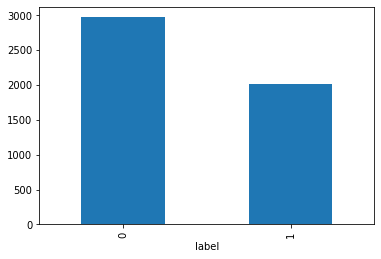

In [7]:
#print number of data in each label
#0 is true
#1 is fake
print(dF.groupby(['label'])['text'].count())
dF.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

##wordcloud of fake news with emoji

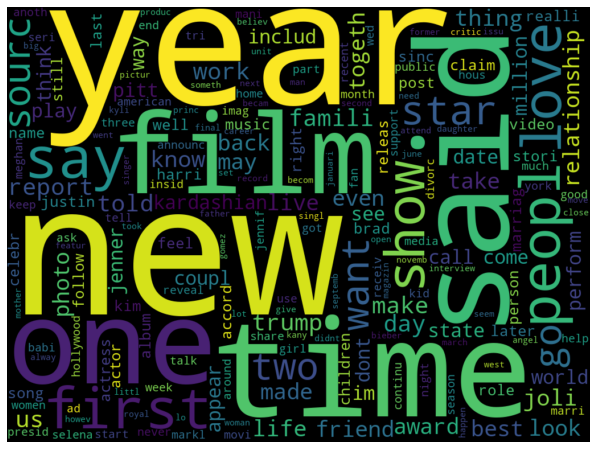

In [8]:
#fake data worldcloud with emoji

from wordcloud import WordCloud

fake = dF[dF['label'] == '1']
words = ' '.join([st for st in fake['text']])
cloud = WordCloud(width= 1024, height= 764, collocations = False).generate(words)
plt.figure(figsize=(20,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##wordcloud of fake news without emoji

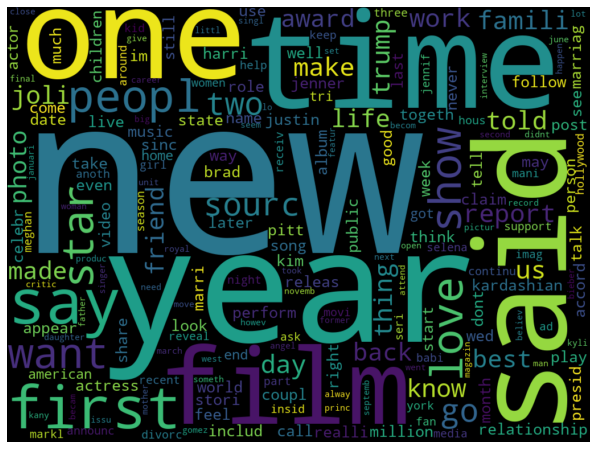

In [9]:
#fake data worldcloud without emoji

from wordcloud import WordCloud

fake = df[df['label'] == '1']
words = ' '.join([st for st in fake['text']])
cloud = WordCloud(width= 1024, height= 764, collocations = False).generate(words)
plt.figure(figsize=(20,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##wordcloud of real news with emoji

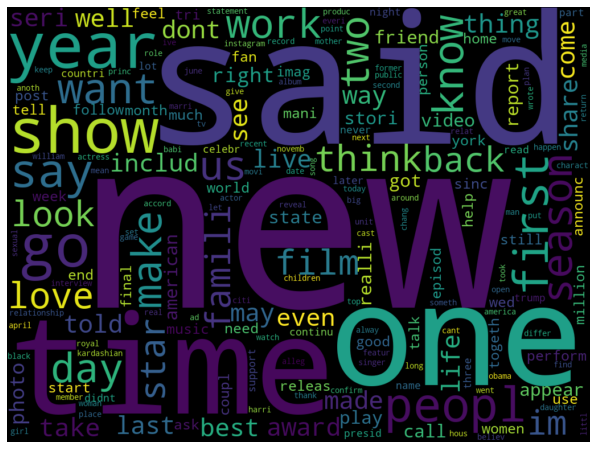

In [10]:
#real data worldcloud with emoji

real = dF[dF['label'] == '0']
words = ' '.join([st for st in real['text']])
cloud = WordCloud(width= 1024, height= 764, collocations = False).generate(words)
plt.figure(figsize=(20,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##wordcloud of real news without emoji

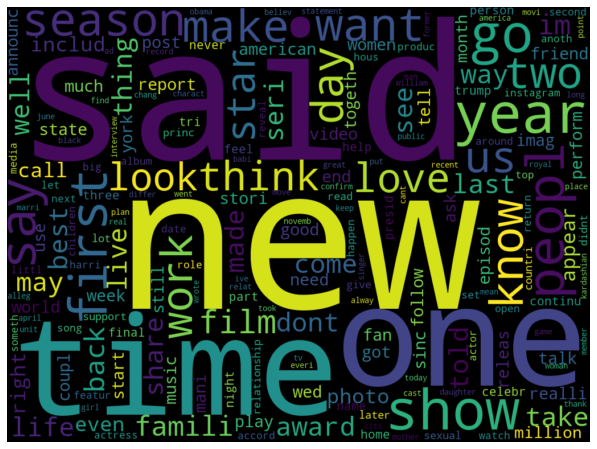

In [11]:
#real data worldcloud without emoji

real = df[df['label'] == '0']
words = ' '.join([st for st in real['text']])
cloud = WordCloud(width= 1024, height= 764, collocations = False).generate(words)
plt.figure(figsize=(20,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##split data to test and train with emoji

In [12]:
#split data to train and test with emoji

x_train, x_test, y_train, y_test = train_test_split(dF['text'], dF['label'], test_size = 0.2, random_state = 5)
t_vectorizer=TfidfVectorizer(stop_words='english')
t_train=t_vectorizer.fit_transform(x_train) 
t_test=t_vectorizer.transform(x_test)

##split data to test and train without emoji

In [13]:
#split data to train and test without emoji

xo_train, xo_test, yo_train, yo_test = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 5)
to_vectorizer=TfidfVectorizer(stop_words='english')
to_train=to_vectorizer.fit_transform(xo_train) 
to_test=to_vectorizer.transform(xo_test)

##passive aggressive classifier with emoji

In [14]:
#passive aggressive classifier with emoji

pass_agr_class=PassiveAggressiveClassifier()
pass_agr_class.fit(t_train,y_train)
y_pred = pass_agr_class.predict(t_test)
print('Accuracy: ', accuracy_score(y_test,y_pred)*100,'%')
print('confusion matrix: \n', confusion_matrix(y_test,y_pred))
print('classification report: \n',classification_report(y_test,y_pred))

Accuracy:  76.45290581162325 %
confusion matrix: 
 [[470 114]
 [121 293]]
classification report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       584
           1       0.72      0.71      0.71       414

    accuracy                           0.76       998
   macro avg       0.76      0.76      0.76       998
weighted avg       0.76      0.76      0.76       998



Text(0.5, 13.421126458070283, 'predicted label')

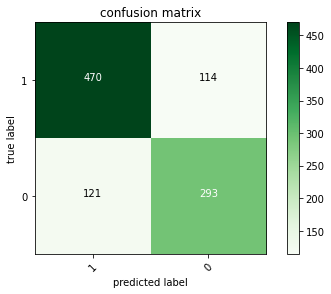

In [15]:
#show confusion matrix diagram passive aggressive classifier with emoji

conf_mat = confusion_matrix(y_test,y_pred)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2
for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [16]:
#validation for passive aggressive classifier with emoji

random_state = [i for i in range(40,105,5)]
max_iter=[i for i in range(1000, 2100, 100)]
C = [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]
param_grid = dict(max_iter=max_iter,C=C, random_state=random_state)
random = RandomizedSearchCV(estimator=pass_agr_class, param_distributions=param_grid, cv = 5, n_jobs=-1, n_iter=1050)
random_result = random.fit(t_train,y_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_result.best_score_, random_result.best_params_))


Best Mean cross-validated score of the best_estimator: 0.744728 
 using parameters: {'random_state': 45, 'max_iter': 1700, 'C': 4}


In [17]:
# predict valid passive aggressive with emoji

valid_pac_predict = random_result.best_estimator_.predict(t_test)
print('Accuracy: ', accuracy_score(y_test,valid_pac_predict)*100,'%')
print('confusion matrix: \n', confusion_matrix(y_test,valid_pac_predict))
print('classification report: \n',classification_report(y_test,valid_pac_predict))

Accuracy:  76.15230460921843 %
confusion matrix: 
 [[482 102]
 [136 278]]
classification report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       584
           1       0.73      0.67      0.70       414

    accuracy                           0.76       998
   macro avg       0.76      0.75      0.75       998
weighted avg       0.76      0.76      0.76       998



##passive aggressive classifier without emoji

In [18]:
#passive aggressive classifier without emoji

pass_agr_classo=PassiveAggressiveClassifier()
pass_agr_classo.fit(to_train,yo_train)
yo_pred = pass_agr_classo.predict(to_test)
print('Accuracy: ', accuracy_score(yo_test,yo_pred)*100,'%')
print('confusion matrix: \n', confusion_matrix(yo_test,yo_pred))
print('classification report: \n',classification_report(yo_test,yo_pred))

Accuracy:  76.05210420841684 %
confusion matrix: 
 [[468 116]
 [123 291]]
classification report: 
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       584
           1       0.71      0.70      0.71       414

    accuracy                           0.76       998
   macro avg       0.75      0.75      0.75       998
weighted avg       0.76      0.76      0.76       998



Text(0.5, 13.421126458070283, 'predicted label')

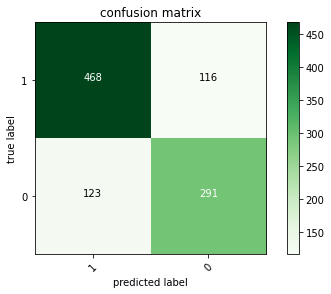

In [19]:
#show confusion matrix diagram passive aggressive classifier without emoji

conf_mat = confusion_matrix(yo_test,yo_pred)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2
for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [20]:
#validation for passive aggressive classifier without emoji

random_stateo = [i for i in range(40,105,5)]
max_itero=[i for i in range(1000, 2100, 100)]
Co = [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]
param_grido = dict(max_iter=max_itero,C=Co, random_state=random_stateo)
randomo = RandomizedSearchCV(estimator=pass_agr_classo, param_distributions=param_grido, cv = 5, n_jobs=-1, n_iter=1050)
random_resulto = random.fit(to_train,yo_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_resulto.best_score_, random_resulto.best_params_))


Best Mean cross-validated score of the best_estimator: 0.745229 
 using parameters: {'random_state': 45, 'max_iter': 1900, 'C': 2.0}


In [21]:
# predict valid passive aggressive without emoji

valid_pac_predicto = random_resulto.best_estimator_.predict(to_test)
print('Accuracy: ', accuracy_score(yo_test,valid_pac_predicto)*100,'%')
print('confusion matrix: \n', confusion_matrix(yo_test,valid_pac_predicto))
print('classification report: \n',classification_report(yo_test,valid_pac_predicto))

Accuracy:  75.95190380761522 %
confusion matrix: 
 [[482 102]
 [138 276]]
classification report: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       584
           1       0.73      0.67      0.70       414

    accuracy                           0.76       998
   macro avg       0.75      0.75      0.75       998
weighted avg       0.76      0.76      0.76       998



##logistic regression with emoji

In [22]:
#logistic regression

lgr = LogisticRegression()
lgr.fit(t_train,y_train)
predict=lgr.predict(t_test)
print('Accuracy: ', accuracy_score(y_test, predict)*100, '%')
print('Confusion matrix: \n',confusion_matrix(y_test, predict))
print('classification report: \n', classification_report(y_test, predict))

Accuracy:  77.45490981963928 %
Confusion matrix: 
 [[534  50]
 [175 239]]
classification report: 
               precision    recall  f1-score   support

           0       0.75      0.91      0.83       584
           1       0.83      0.58      0.68       414

    accuracy                           0.77       998
   macro avg       0.79      0.75      0.75       998
weighted avg       0.78      0.77      0.77       998



Text(0.5, 13.421126458070283, 'predicted label')

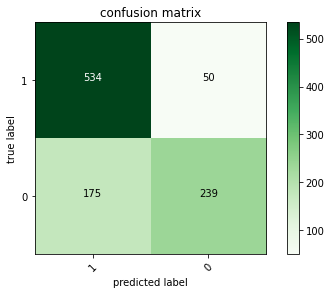

In [23]:
#show confusion matrix diagram for logistic regression

conf_mat = confusion_matrix(y_test, predict)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2
for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [24]:
#validation for logistic regression
penalty=['l2', 'l1']
solver = ['newton-cg', 'sag', 'saga' ,'lbfgs']
dual=[True,False]
max_iter=[i for i in range(50, 205, 15)]
C = [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]
param_grid = dict(dual=dual,max_iter=max_iter,C=C, solver=solver, penalty=penalty)
random = GridSearchCV(estimator=lgr, param_grid=param_grid, cv = 5, n_jobs=-1)
random_result = random.fit(t_train,y_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_result.best_score_, random_result.best_params_))


Best Mean cross-validated score of the best_estimator: 0.770808 
 using parameters: {'C': 2.5, 'dual': False, 'max_iter': 80, 'penalty': 'l2', 'solver': 'saga'}


In [25]:
# predict valid logistic regression

valid_lgr_predict = random_result.best_estimator_.predict(t_test)
print('Accuracy: ', accuracy_score(y_test,valid_lgr_predict)*100,'%')
print('confusion matrix: \n', confusion_matrix(y_test,valid_lgr_predict))
print('classification report: \n',classification_report(y_test,valid_lgr_predict))

Accuracy:  78.2565130260521 %
confusion matrix: 
 [[517  67]
 [150 264]]
classification report: 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       584
           1       0.80      0.64      0.71       414

    accuracy                           0.78       998
   macro avg       0.79      0.76      0.77       998
weighted avg       0.78      0.78      0.78       998



##logistic regression without emoji

In [26]:
#logistic regression without emoji

lgro = LogisticRegression()
lgro.fit(t_train,y_train)
predicto=lgro.predict(t_test)
print('Accuracy: ', accuracy_score(yo_test, predicto)*100, '%')
print('Confusion matrix: \n',confusion_matrix(yo_test, predicto))
print('classification report: \n', classification_report(yo_test, predicto))

Accuracy:  77.45490981963928 %
Confusion matrix: 
 [[534  50]
 [175 239]]
classification report: 
               precision    recall  f1-score   support

           0       0.75      0.91      0.83       584
           1       0.83      0.58      0.68       414

    accuracy                           0.77       998
   macro avg       0.79      0.75      0.75       998
weighted avg       0.78      0.77      0.77       998



Text(0.5, 13.421126458070283, 'predicted label')

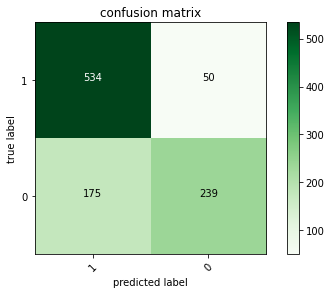

In [27]:
#show confusion matrix diagram for logistic regression without emoji

conf_mat = confusion_matrix(yo_test, predicto)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2
for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [28]:
#validation for logistic regression without emoji
penaltyo=['l2', 'l1']
solvero = ['newton-cg', 'sag', 'saga' ,'lbfgs']
dualo=[True,False]
max_itero=[i for i in range(50, 205, 15)]
Co = [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]
param_grido = dict(dual=dualo,max_iter=max_itero,C=Co, solver=solvero, penalty=penaltyo)
randomo = GridSearchCV(estimator=lgro, param_grid=param_grido, cv = 5, n_jobs=-1)
random_resulto = randomo.fit(to_train,yo_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_resulto.best_score_, random_resulto.best_params_))


Best Mean cross-validated score of the best_estimator: 0.768301 
 using parameters: {'C': 3, 'dual': False, 'max_iter': 155, 'penalty': 'l2', 'solver': 'saga'}


In [29]:
# predict valid logistic regression without emoji

valid_lgr_predicto = random_resulto.best_estimator_.predict(to_test)
print('Accuracy: ', accuracy_score(yo_test,valid_lgr_predicto)*100,'%')
print('confusion matrix: \n', confusion_matrix(yo_test,valid_lgr_predicto))
print('classification report: \n',classification_report(yo_test,valid_lgr_predicto))

Accuracy:  78.3567134268537 %
confusion matrix: 
 [[516  68]
 [148 266]]
classification report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       584
           1       0.80      0.64      0.71       414

    accuracy                           0.78       998
   macro avg       0.79      0.76      0.77       998
weighted avg       0.79      0.78      0.78       998



##decision tree classifier with emoji

In [30]:
#decision tree classifier with emoji

dtc = DecisionTreeClassifier()

dtc.fit(t_train,y_train)
predict_dtc = dtc.predict(t_test)
print('Accuracy: ', accuracy_score(y_test, predict_dtc)*100, '%')
print('Confusion matrix: \n', confusion_matrix(y_test, predict_dtc))
print('Classification report\n', classification_report(y_test, predict_dtc))

Accuracy:  67.53507014028057 %
Confusion matrix: 
 [[434 150]
 [174 240]]
Classification report
               precision    recall  f1-score   support

           0       0.71      0.74      0.73       584
           1       0.62      0.58      0.60       414

    accuracy                           0.68       998
   macro avg       0.66      0.66      0.66       998
weighted avg       0.67      0.68      0.67       998



Text(0.5, 13.421126458070283, 'predicted label')

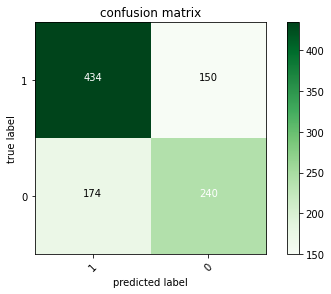

In [31]:
#show confusion matrix diagram decision tree classifier with emoji

conf_mat = confusion_matrix(y_test, predict_dtc)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2
for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [33]:
#validation for decision tree with emoji
random_state = [i for i in range(40,105,5)]
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [i for i in range (20, 105, 5)]
param_grid = dict(max_depth=max_depth,splitter = splitter, criterion = criterion, random_state = random_state)
random = RandomizedSearchCV(estimator=dtc, param_distributions=param_grid, cv = 5, n_jobs=-1, n_iter=50)
random_result = random.fit(t_train,y_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_result.best_score_, random_result.best_params_))


Best Mean cross-validated score of the best_estimator: 0.702607 
 using parameters: {'splitter': 'random', 'random_state': 40, 'max_depth': 30, 'criterion': 'entropy'}


In [34]:
# predict valid decision tree classifier with emoji

valid_dtc_predict = random_result.best_estimator_.predict(t_test)
print('Accuracy: ', accuracy_score(y_test,valid_dtc_predict)*100,'%')
print('confusion matrix: \n', confusion_matrix(y_test,valid_dtc_predict))
print('classification report: \n',classification_report(y_test,valid_dtc_predict))

Accuracy:  71.04208416833667 %
confusion matrix: 
 [[501  83]
 [206 208]]
classification report: 
               precision    recall  f1-score   support

           0       0.71      0.86      0.78       584
           1       0.71      0.50      0.59       414

    accuracy                           0.71       998
   macro avg       0.71      0.68      0.68       998
weighted avg       0.71      0.71      0.70       998



##decision tree classifier without emoji

In [35]:
#decision tree classifier without emoji

dtco = DecisionTreeClassifier()

dtco.fit(to_train,yo_train)
predict_dtco = dtco.predict(to_test)
print('Accuracy: ', accuracy_score(yo_test, predict_dtco)*100, '%')
print('Confusion matrix: \n', confusion_matrix(yo_test, predict_dtco))
print('Classification report', classification_report(yo_test, predict_dtco))

Accuracy:  69.13827655310621 %
Confusion matrix: 
 [[441 143]
 [165 249]]
Classification report               precision    recall  f1-score   support

           0       0.73      0.76      0.74       584
           1       0.64      0.60      0.62       414

    accuracy                           0.69       998
   macro avg       0.68      0.68      0.68       998
weighted avg       0.69      0.69      0.69       998



Text(0.5, 13.421126458070283, 'predicted label')

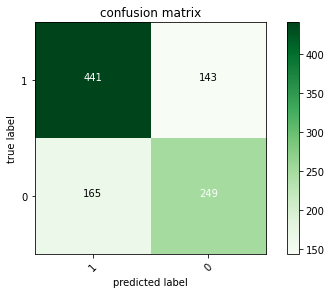

In [36]:
#show confusion matrix diagram decision tree classifier without emoji

conf_mat = confusion_matrix(yo_test, predict_dtco)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2
for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [37]:
#validation for decision tree without emoji
random_stateo = [i for i in range(40,105,5)]
criteriono = ['gini', 'entropy']
splittero = ['best', 'random']
max_deptho = [i for i in range (20, 105, 5)]
param_grido = dict(max_depth=max_deptho,splitter = splittero, criterion = criteriono, random_state = random_stateo)
randomo = RandomizedSearchCV(estimator=dtco, param_distributions=param_grido, cv = 5, n_jobs=-1, n_iter=50)
random_resulto = random.fit(to_train,yo_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_resulto.best_score_, random_resulto.best_params_))


Best Mean cross-validated score of the best_estimator: 0.693078 
 using parameters: {'splitter': 'random', 'random_state': 55, 'max_depth': 75, 'criterion': 'entropy'}


In [38]:
# predict valid decision tree classifier without emoji

valid_dtc_predicto = random_resulto.best_estimator_.predict(to_test)
print('Accuracy: ', accuracy_score(yo_test,valid_dtc_predicto)*100,'%')
print('confusion matrix: \n', confusion_matrix(yo_test,valid_dtc_predicto))
print('classification report: \n',classification_report(yo_test,valid_dtc_predicto))

Accuracy:  70.64128256513025 %
confusion matrix: 
 [[473 111]
 [182 232]]
classification report: 
               precision    recall  f1-score   support

           0       0.72      0.81      0.76       584
           1       0.68      0.56      0.61       414

    accuracy                           0.71       998
   macro avg       0.70      0.69      0.69       998
weighted avg       0.70      0.71      0.70       998



##random forest classifier with emoji

In [39]:
#random forest classifier with emoji

rfc = RandomForestClassifier()
rfc.fit(t_train,y_train)
predict_rfc = rfc.predict(t_test)
print('Accuracy: ', accuracy_score(y_test, predict_rfc)*100, '%')
print('Confusion matrix: \n', confusion_matrix(y_test, predict_rfc))
print('Classification report: \n', classification_report(y_test, predict_rfc))

Accuracy:  76.45290581162325 %
Confusion matrix: 
 [[549  35]
 [200 214]]
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.94      0.82       584
           1       0.86      0.52      0.65       414

    accuracy                           0.76       998
   macro avg       0.80      0.73      0.73       998
weighted avg       0.79      0.76      0.75       998



Text(0.5, 13.421126458070283, 'predicted label')

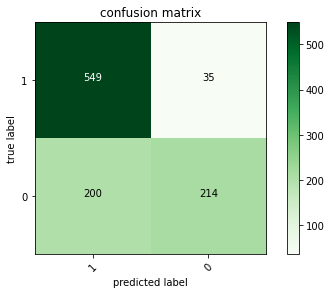

In [40]:
#show confusion matrix diagram for random forest classifier with emoji

conf_mat = confusion_matrix(y_test, predict_rfc)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2
for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])): 
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [42]:
#validation of random forest with emoji

random_state = [i for i in range(40,105,5)]
criterion = ['gini', 'entropy']
max_depth = [i for i in range (20, 105, 5)]
n_estimators = [i for i in range(50, 200, 10)]
param_grid = dict(max_depth=max_depth, criterion = criterion, random_state = random_state, n_estimators = n_estimators)
random = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv = 5, n_jobs=-1, n_iter=50 )
random_result = random.fit(t_train,y_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_result.best_score_, random_result.best_params_))


Best Mean cross-validated score of the best_estimator: 0.759782 
 using parameters: {'random_state': 50, 'n_estimators': 100, 'max_depth': 100, 'criterion': 'entropy'}


In [43]:
# predict valid random forest with emoji

predict_rf_valid = random_result.best_estimator_.predict(t_test)
print('Accuracy: ', accuracy_score(y_test,predict_rf_valid)*100,'%')
print('confusion matrix: \n', confusion_matrix(y_test,predict_rf_valid))
print('classification report: \n',classification_report(y_test,predict_rf_valid))

Accuracy:  75.95190380761522 %
confusion matrix: 
 [[550  34]
 [206 208]]
classification report: 
               precision    recall  f1-score   support

           0       0.73      0.94      0.82       584
           1       0.86      0.50      0.63       414

    accuracy                           0.76       998
   macro avg       0.79      0.72      0.73       998
weighted avg       0.78      0.76      0.74       998



##random forest classifier without emoji

In [44]:
#random forest classifier without emoji

rfco = RandomForestClassifier()
rfco.fit(to_train,yo_train)
predict_rfco = rfco.predict(to_test)
print('Accuracy: ', accuracy_score(yo_test, predict_rfco)*100, '%')
print('Confusion matrix: \n', confusion_matrix(yo_test, predict_rfco))
print('Classification report: \n', classification_report(yo_test, predict_rfco))

Accuracy:  75.75150300601202 %
Confusion matrix: 
 [[542  42]
 [200 214]]
Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.93      0.82       584
           1       0.84      0.52      0.64       414

    accuracy                           0.76       998
   macro avg       0.78      0.72      0.73       998
weighted avg       0.77      0.76      0.74       998



Text(0.5, 13.421126458070283, 'predicted label')

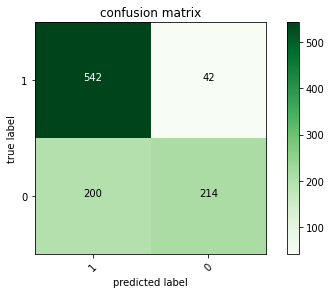

In [45]:
#show confusion matrix diagram for random forest classifier without emoji

conf_mat = confusion_matrix(yo_test, predict_rfco)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2
for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])): 
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [46]:
#validation of random forest without emoji

random_stateo = [i for i in range(40,105,5)]
criteriono = ['gini', 'entropy']
max_deptho = [i for i in range (20, 105, 5)]
n_estimatorso = [i for i in range(50, 200, 10)]
param_grido = dict(max_depth=max_deptho, criterion = criteriono, random_state = random_stateo, n_estimators = n_estimatorso)
randomo = RandomizedSearchCV(estimator=rfco, param_distributions=param_grido, cv = 5, n_jobs=-1, n_iter=50 )
random_resulto = randomo.fit(to_train,yo_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_resulto.best_score_, random_resulto.best_params_))


Best Mean cross-validated score of the best_estimator: 0.761035 
 using parameters: {'random_state': 80, 'n_estimators': 170, 'max_depth': 100, 'criterion': 'gini'}


In [47]:
# predict valid random forest without emoji

predict_rf_valido = random_resulto.best_estimator_.predict(to_test)
print('Accuracy: ', accuracy_score(yo_test,predict_rf_valido)*100,'%')
print('confusion matrix: \n', confusion_matrix(yo_test,predict_rf_valido))
print('classification report: \n',classification_report(yo_test,predict_rf_valido))

Accuracy:  76.55310621242485 %
confusion matrix: 
 [[547  37]
 [197 217]]
classification report: 
               precision    recall  f1-score   support

           0       0.74      0.94      0.82       584
           1       0.85      0.52      0.65       414

    accuracy                           0.77       998
   macro avg       0.79      0.73      0.74       998
weighted avg       0.78      0.77      0.75       998



##naive bayes with emoji

In [48]:
#naive bayes with emoji

NB_model = MultinomialNB()
NB_model.fit(t_train,y_train)
y_predict_nb = NB_model.predict(t_test)
print('Accuracy: ', accuracy_score(y_test, y_predict_nb)*100,'%')
print('Confusion matrix: \n', confusion_matrix(y_test, y_predict_nb))
print('Classification report: \n', classification_report(y_test, y_predict_nb))

Accuracy:  68.23647294589178 %
Confusion matrix: 
 [[577   7]
 [310 104]]
Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.99      0.78       584
           1       0.94      0.25      0.40       414

    accuracy                           0.68       998
   macro avg       0.79      0.62      0.59       998
weighted avg       0.77      0.68      0.62       998



Text(0.5, 13.421126458070283, 'predicted label')

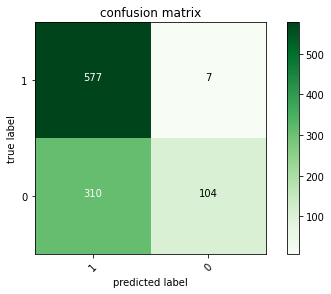

In [49]:
#show confusion matrix diagram for naive bayes with emoji

conf_mat = confusion_matrix(y_test, y_predict_nb)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2

for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [50]:
#validation for naive bayes with emoji

from numpy import arange

alpha = [i for i in arange(0.5, 20.0, 0.5)]
fit_prior = [False, True]
param_grid = dict(alpha = alpha, fit_prior = fit_prior)
random = GridSearchCV(estimator=NB_model, param_grid=param_grid, cv = 5, n_jobs=-1)
random_result = random.fit(t_train,y_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_result.best_score_, random_result.best_params_))


Best Mean cross-validated score of the best_estimator: 0.734950 
 using parameters: {'alpha': 0.5, 'fit_prior': False}


In [51]:
# predict valid naive bayes with emoji

predict_nb_valid = random_result.best_estimator_.predict(t_test)
print('Accuracy: ', accuracy_score(y_test,predict_nb_valid)*100,'%')
print('confusion matrix: \n', confusion_matrix(y_test,predict_nb_valid))
print('classification report: \n',classification_report(y_test,predict_nb_valid))


Accuracy:  74.34869739478958 %
confusion matrix: 
 [[552  32]
 [224 190]]
classification report: 
               precision    recall  f1-score   support

           0       0.71      0.95      0.81       584
           1       0.86      0.46      0.60       414

    accuracy                           0.74       998
   macro avg       0.78      0.70      0.70       998
weighted avg       0.77      0.74      0.72       998



##naive bayes without emoji

In [52]:
#naive bayes without emoji

NB_modelo = MultinomialNB()
NB_modelo.fit(to_train,yo_train)
y_predict_nbo = NB_modelo.predict(to_test)
print('Accuracy: ', accuracy_score(yo_test, y_predict_nbo)*100,'%')
print('Confusion matrix: \n', confusion_matrix(yo_test, y_predict_nbo))
print('Classification report: \n', classification_report(yo_test, y_predict_nbo))

Accuracy:  68.13627254509018 %
Confusion matrix: 
 [[577   7]
 [311 103]]
Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.99      0.78       584
           1       0.94      0.25      0.39       414

    accuracy                           0.68       998
   macro avg       0.79      0.62      0.59       998
weighted avg       0.77      0.68      0.62       998



Text(0.5, 13.421126458070283, 'predicted label')

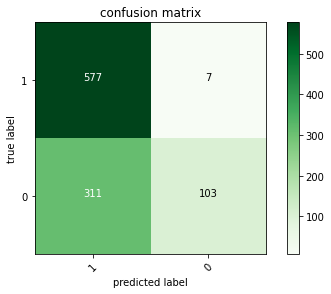

In [53]:
#show confusion matrix diagram for naive bayes without emoji

conf_mat = confusion_matrix(yo_test, y_predict_nbo)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2

for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [54]:
#validation for naive bayes without emoji

from numpy import arange

alphao = [i for i in arange(0.5, 20.0, 0.5)]
fit_prioro = [False, True]
param_grido = dict(alpha = alphao, fit_prior = fit_prioro)
randomo = GridSearchCV(estimator=NB_modelo, param_grid=param_grido, cv = 5, n_jobs=-1)
random_resulto = randomo.fit(to_train,yo_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_resulto.best_score_, random_resulto.best_params_))


Best Mean cross-validated score of the best_estimator: 0.735202 
 using parameters: {'alpha': 0.5, 'fit_prior': False}


In [55]:
# predict valid naive bayes without emoji

predict_nb_valido = random_resulto.best_estimator_.predict(to_test)
print('Accuracy: ', accuracy_score(yo_test,predict_nb_valido)*100,'%')
print('confusion matrix: \n', confusion_matrix(yo_test,predict_nb_valido))
print('classification report: \n',classification_report(yo_test,predict_nb_valido))


Accuracy:  74.44889779559118 %
confusion matrix: 
 [[553  31]
 [224 190]]
classification report: 
               precision    recall  f1-score   support

           0       0.71      0.95      0.81       584
           1       0.86      0.46      0.60       414

    accuracy                           0.74       998
   macro avg       0.79      0.70      0.71       998
weighted avg       0.77      0.74      0.72       998



##linear SVC with emoji

In [56]:
#Linear SVC with emoji

clf = LinearSVC(C = 0.5)
clf.fit(t_train,y_train)
y_predict_lr = clf.predict(t_test)
print('Accuracy: ',accuracy_score(y_test, y_predict_lr)*100,'%')
print('Confusion matrix: \n',confusion_matrix(y_test, y_predict_lr))
print('Classification report: \n', classification_report(y_test, y_predict_lr))

Accuracy:  78.4569138276553 %
Confusion matrix: 
 [[506  78]
 [137 277]]
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.87      0.82       584
           1       0.78      0.67      0.72       414

    accuracy                           0.78       998
   macro avg       0.78      0.77      0.77       998
weighted avg       0.78      0.78      0.78       998



Text(0.5, 13.421126458070283, 'predicted label')

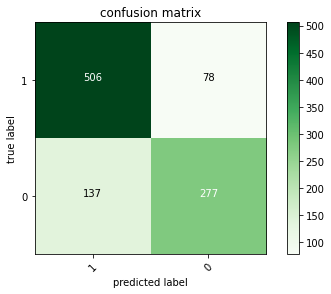

In [57]:
#show confusion matrix diagram for Linear SVC with emoji

conf_mat = confusion_matrix(y_test, y_predict_lr)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2

for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [58]:
#validation for linear svc with emoji

penalty = ['l1', 'l2']
loss = ['hinge', 'squard_hinge']
dual = [False, True]
max_iter=[i for i in range(1000, 2000, 50)]
C = [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]
multi_class = ['ovr', 'crammer_singer']
fit_intercept = [True, False]
param_grid = dict(dual=dual,max_iter=max_iter,C=C, penalty=penalty,
                 loss=loss, multi_class=multi_class, fit_intercept=fit_intercept)
random = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv = 5, n_jobs=-1, n_iter=500)
random_result = random.fit(t_train,y_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_result.best_score_, random_result.best_params_))


Best Mean cross-validated score of the best_estimator: 0.766295 
 using parameters: {'penalty': 'l1', 'multi_class': 'crammer_singer', 'max_iter': 1100, 'loss': 'squard_hinge', 'fit_intercept': False, 'dual': False, 'C': 0.5}


In [59]:
# predict valid linear svc with emoji

predict_clf_valid = random_result.best_estimator_.predict(t_test)
print('Accuracy: ', accuracy_score(y_test,predict_clf_valid)*100,'%')
print('confusion matrix: \n', confusion_matrix(y_test,predict_clf_valid))
print('classification report: \n',classification_report(y_test,predict_clf_valid))

Accuracy:  77.55511022044088 %
confusion matrix: 
 [[494  90]
 [134 280]]
classification report: 
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       584
           1       0.76      0.68      0.71       414

    accuracy                           0.78       998
   macro avg       0.77      0.76      0.76       998
weighted avg       0.77      0.78      0.77       998



##linear SVC without emoji

In [60]:
#Linear SVC without emoji

clfo = LinearSVC(C = 0.5)
clfo.fit(to_train,yo_train)
y_predict_lro = clfo.predict(to_test)
print('Accuracy: ',accuracy_score(yo_test, y_predict_lro)*100,'%')
print('Confusion matrix: \n',confusion_matrix(yo_test, y_predict_lro))
print('Classification report: \n', classification_report(yo_test, y_predict_lro))

Accuracy:  78.2565130260521 %
Confusion matrix: 
 [[505  79]
 [138 276]]
Classification report: 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       584
           1       0.78      0.67      0.72       414

    accuracy                           0.78       998
   macro avg       0.78      0.77      0.77       998
weighted avg       0.78      0.78      0.78       998



Text(0.5, 13.421126458070283, 'predicted label')

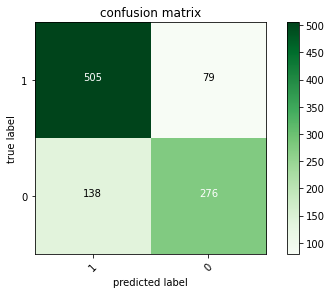

In [61]:
#show confusion matrix diagram for Linear SVC without emoji

conf_mat = confusion_matrix(yo_test, y_predict_lro)
plt.imshow(conf_mat, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title('confusion matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['1', '0'], rotation = 45)
plt.yticks(tick_marks, ['1', '0'])
thresh = conf_mat.max() / 2

for i, j in itertools.product(range(conf_mat.shape[0]),range(conf_mat.shape[1])):
    plt.text(j, i, conf_mat[i, j], horizontalalignment="center", color="white" if conf_mat[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('true label')
plt.xlabel('predicted label')

In [62]:
#validation for linear svc without emoji

penaltyo = ['l1', 'l2']
losso = ['hinge', 'squard_hinge']
dualo = [False, True]
max_itero=[i for i in range(1000, 2000, 50)]
Co = [0.5, 1.0, 1.5, 2.0, 2.5, 3, 3.5, 4]
multi_classo = ['ovr', 'crammer_singer']
fit_intercepto = [True, False]
param_grido = dict(dual=dualo,max_iter=max_itero,C=Co, penalty=penaltyo,
                 loss=losso, multi_class=multi_classo, fit_intercept=fit_intercepto)
randomo = RandomizedSearchCV(estimator=clfo, param_distributions=param_grido, cv = 5, n_jobs=-1, n_iter=500)
random_resulto = randomo.fit(to_train,yo_train)
# Summarize results
print("Best Mean cross-validated score of the best_estimator: %f \n using parameters: %s" % (random_resulto.best_score_, random_resulto.best_params_))


Best Mean cross-validated score of the best_estimator: 0.765543 
 using parameters: {'penalty': 'l2', 'multi_class': 'ovr', 'max_iter': 1650, 'loss': 'hinge', 'fit_intercept': False, 'dual': True, 'C': 0.5}


In [63]:
# predict valid linear svc with emoji

predict_clf_valido = random_resulto.best_estimator_.predict(to_test)
print('Accuracy: ', accuracy_score(yo_test,predict_clf_valido)*100,'%')
print('confusion matrix: \n', confusion_matrix(yo_test,predict_clf_valido))
print('classification report: \n',classification_report(yo_test,predict_clf_valido))

Accuracy:  78.4569138276553 %
confusion matrix: 
 [[526  58]
 [157 257]]
classification report: 
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       584
           1       0.82      0.62      0.71       414

    accuracy                           0.78       998
   macro avg       0.79      0.76      0.77       998
weighted avg       0.79      0.78      0.78       998

